In [385]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [386]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

import src.crs as crs
from IPython.display import clear_output

# Load Data

In [387]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

copy_df = df.copy()

In [388]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [389]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

setting start
setting end
10 / 248 ==> 86.59197694420115
20 / 248 ==> 82.25192290339265
30 / 248 ==> 82.02278780848025
40 / 248 ==> 80.2559449020795
50 / 248 ==> 80.69326712019428
60 / 248 ==> 80.85501309261018
70 / 248 ==> 82.55446778055097
80 / 248 ==> 81.76815564191381
90 / 248 ==> 87.37300532946604
100 / 248 ==> 80.3174146788322
110 / 248 ==> 82.4552562878583
120 / 248 ==> 78.75692375928045
130 / 248 ==> 87.76419390148543
140 / 248 ==> 82.58120512532673
150 / 248 ==> 85.71385500659918
160 / 248 ==> 87.74958412035029
170 / 248 ==> 84.25890472801676
180 / 248 ==> 80.13576430659145
190 / 248 ==> 80.06429418856764
200 / 248 ==> 84.21968960736092
210 / 248 ==> 87.19927219018075
220 / 248 ==> 84.49762069415164
230 / 248 ==> 84.14331354958318
240 / 248 ==> 83.89313592200844
248 / 248 ==> 82.90614319457522


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,3.0,2.0,3.0,6.0,6.0,2.0,2.0,1.0,1.0,2.0,...,1.0,5.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,3.0
1,0.0,6.0,1.0,2.0,2.0,6.0,6.0,0.0,6.0,6.0,...,1.0,1.0,5.0,6.0,5.0,0.0,1.0,1.0,1.0,3.0
2,6.0,6.0,6.0,5.0,5.0,6.0,3.0,6.0,6.0,3.0,...,5.0,1.0,1.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0
3,6.0,6.0,0.0,0.0,6.0,3.0,3.0,3.0,2.0,6.0,...,6.0,2.0,3.0,5.0,4.0,5.0,6.0,3.0,3.0,5.0
4,5.0,3.0,3.0,3.0,3.0,6.0,1.0,6.0,0.0,5.0,...,0.0,4.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0


# Contribution Map

In [390]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

cont_mean_df = remove_anomaly(df, contribution_df)

print("{} ~ {} 까지의 기여도 그룹이 만들어졌다.".format(
    cont_mean_df['contribution'].min(), cont_mean_df['contribution'].max()))
cont_count = pd.DataFrame(
    cont_mean_df['contribution'].groupby(cont_mean_df['contribution']).count()
)
cont_count.columns = ['그룹 멤버 수']
cont_count

1.0 ~ 6.0 까지의 기여도 그룹이 만들어졌다.


,그룹 멤버 수
contribution,
1.0,7
2.0,15
3.0,33
4.0,26
5.0,20
6.0,7


# 대표 클러스터링 패턴 선정
- 각 기여도 그룹의 가구들은 n시간 마다 특정 군집에 속해있었다.
- 특정 기여도 그룹의 n개의 시간대의 대표 클러스터링 패턴 선정은 해당 그룹의 멤버들이 가장 많이 속해 있었던 클러스터링으로 선정을 하겠다.

In [391]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc_cont = calc_contribution_rank(cc, ci)
cc_cont.index = contribution_df.index

cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,6.0,2.0,2.0,3.0,3.0,4.0
1,2.0,6.0,6.0,0.0,5.0,3.0
2,5.0,6.0,3.0,2.0,2.0,4.0
3,0.0,6.0,3.0,3.0,5.0,2.0
4,3.0,3.0,1.0,0.0,0.0,2.0


## 선정된 대표 클러스터링의 패턴 파싱하기

In [392]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.067,0.166,0.166,0.364,0.364,0.675
2018-05-01 01:00:00,0.063,0.154,0.154,0.345,0.345,0.571
2018-05-01 02:00:00,0.056,0.162,0.162,0.363,0.363,0.476
2018-05-01 03:00:00,0.062,0.165,0.165,0.249,0.330,0.442
2018-05-01 04:00:00,0.051,0.163,0.163,0.267,0.303,0.389


## 전체 클러스터 평균

In [393]:
_all_cluster = np.array([])
_hc_t = hc.T.copy()

for div_round, _hc_t_col in enumerate(_hc_t):
    count_group = _hc_t[_hc_t_col].groupby(_hc_t[_hc_t_col]).count()
    max_idx = count_group.argmax()
    _all_cluster = np.append(_all_cluster, max_idx)
    
all_cluster = pd.DataFrame(_all_cluster, 
                           index=cc_pattern.index[::3],
                          columns=["전체 클러스터 기여도 평균"])

acc = all_cluster.copy()

all_cluster_cont = calc_contribution_rank(acc, ci)
all_cluster_cont.index = cc_pattern.index[::3]

all_cluster_cont.head()

,전체 클러스터 기여도 평균
2018-05-01 00:00:00,2.0
2018-05-01 03:00:00,2.0
2018-05-01 06:00:00,3.0
2018-05-01 09:00:00,3.0
2018-05-01 12:00:00,4.0


In [394]:
all_cluster_pattern = np.array([ci[div_round][0][int(cluster_num[0])].tolist() for 
                       div_round, cluster_num in enumerate(all_cluster.values)])

acc_pattern = pd.DataFrame(all_cluster_pattern.flatten(), 
                          index=cc_pattern.index,
                          columns=acc.columns)
acc_pattern.head()

,전체 클러스터 기여도 평균
2018-05-01 00:00:00,0.166
2018-05-01 01:00:00,0.154
2018-05-01 02:00:00,0.162
2018-05-01 03:00:00,0.165
2018-05-01 04:00:00,0.163


# Consoling

In [395]:
def consoling():
    print("----기여도 그룹을 선택해주세요.")
    for cc_idx, cc_col in enumerate(cc_cols):
        print("{}.{}".format(cc_idx + 1, cc_col))
    print()

    sel_group = int(input())
    sel_cont = cont_mean_df[cont_mean_df['contribution'] == sel_group]
    clear_output()

    print("----피드백 가구 선택")
    print(" • 해당 그룹의 가구 수는 {}가구 입니다.\n".format(len(sel_cont)))
    print("----가구를 선택해주세요.")
    for hh_idx, hh_col in enumerate(sel_cont.index):
        print("{}.{}({}kWh)".format(hh_idx + 1, hh_col, df[hh_col].sum().round().astype("int")))
    sel_hh = int(input())
    sel_hh_col = sel_cont.index[sel_hh - 1]
    clear_output()

    print("----선택 정보를 확인해주세요.")
    print("그룹 명 : {}".format(cc_cols[sel_group - 1]))
    print("가구 명 : {}\n".format(sel_hh_col))

    target_group = sel_group - 1
    if target_group <= 0:
        print("[X] 전기 절약을 잘 실천하고 있는 가구 입니다.")
    else:
        print("----원하시는 피드백 정보를 선택해주세요.")

        sel_cont = contribution_df[sel_hh_col]
        sel_cont_col = cc_cols[target_group - 1]
        target_cont = cc_cont[sel_cont_col]

        clear_output()
        print("----선택 정보를 확인해주세요.")
        print("그룹 명 : {}".format(cc_cols[sel_group - 1]))
        print("가구 명 : {}\n".format(sel_hh_col))

        return cc_cols[sel_group - 1], sel_hh_col

In [396]:
sg, sh = consoling()

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-1505



# 전체 기여도와 비교
- 기여도의 의미적인 관점은 "특정 요일에 대하여 높다" 라는 의미에서 "해당 요일에 적게 쓰는 가구들이 많은 날에 많이 사용했다라는 것을 의미한다"

In [397]:
DAY_ARR = np.array(["월", "화", "수", "목", "금", "토", "일"])
TIME_KOR_STR = np.array(["{}시 ~ {}시".format(_, _+(size-1)) for _ in range(0, 24, size)])

all_day_cols = [df.index.weekday == day for day in range(0, 7)]
day_cols = [acc.index.weekday == day for day in range(0, 7)]
time_cols = [acc.index.time == dt.time(time, 0) for time in range(0, 24, size)]
all_time_cols = [(df.index.time >= dt.time(time, 0)) &
                 (df.index.time <= dt.time(time + (size - 1), 0))
                 for time in range(0, 24, size)]

# Cont Parsing
acc_day_cont = pd.DataFrame(
    [acc[day].mean().round() for day in day_cols],
    index=DAY_ARR)
acc_time_cont = pd.DataFrame(
    [acc[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR)

cc_day_cont = pd.DataFrame(
    [cc_cont[day].mean().round() for day in day_cols],
    index=DAY_ARR,
    columns=cc_cont.columns)
cc_time_cont = pd.DataFrame(
    [cc_cont[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR,
    columns=cc_cont.columns)

day_cont = pd.DataFrame(
    [contribution_df[day].mean().round() for day in day_cols],
    index=DAY_ARR,
    columns=contribution_df.columns)
time_cont = pd.DataFrame(
    [contribution_df[time].mean().round() for time in time_cols],
    index=TIME_KOR_STR,
    columns=contribution_df.columns)

# Usage Parsing
acc_day_usage = pd.DataFrame(
    [round(acc_pattern[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR)
acc_time_usage = pd.DataFrame(
    [round(acc_pattern[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR)

cc_day_usage = pd.DataFrame(
    [round(cc_pattern[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR,
    columns=cc_cont.columns)
cc_time_usage = pd.DataFrame(
    [round(cc_pattern[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR,
    columns=cc_cont.columns)

day_usage = pd.DataFrame(
    [round(df[day].mean() * 1000) / 1000 for day in all_day_cols],
    index=DAY_ARR,
    columns=contribution_df.columns)
time_usage = pd.DataFrame(
    [round(df[time].mean() * 1000) / 1000 for time in all_time_cols],
    index=TIME_KOR_STR,
    columns=contribution_df.columns)

# statistics_cont_count
scc = pd.DataFrame()
max_cont = int(contribution_df.values.max())

all_cont_count = np.array([])
for cont_idx in contribution_df.index:
    _cont_count = contribution_df.loc[cont_idx].groupby(contribution_df.loc[cont_idx]).count()
    cont_count = np.array([])
    for _key in range(1, max_cont + 1):
        if _key in _cont_count.keys():
            cont_count = np.append(cont_count, _cont_count[_key])
        else:
            cont_count = np.append(cont_count, 0)
    
    all_cont_count = np.append(all_cont_count, cont_count)
all_cont_count = all_cont_count.reshape(-1, max_cont)

scc = pd.DataFrame(all_cont_count, index=contribution_df.index, columns=range(1, max_cont+1))

scc.head()

def sel_pos(value):
    if value >= 2:
        return "very high"
    if value == 1:
        return "high"
    elif value == 0:
        return "eq"
    elif value == -1:
        return "low"
    else:
        return "very row"

## 요일적 비교

In [398]:
day_cont[day_cont.columns[:5]]

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408
월,2.0,2.0,3.0,1.0,1.0
화,2.0,2.0,2.0,1.0,1.0
수,2.0,2.0,2.0,1.0,1.0
목,2.0,2.0,2.0,1.0,1.0
금,3.0,2.0,3.0,1.0,2.0
토,2.0,2.0,3.0,1.0,1.0
일,3.0,2.0,3.0,1.0,1.0


In [399]:
acc_time_cont

,전체 클러스터 기여도 평균
0시 ~ 2시,3.0
3시 ~ 5시,3.0
6시 ~ 8시,3.0
9시 ~ 11시,3.0
12시 ~ 14시,3.0
15시 ~ 17시,3.0
18시 ~ 20시,3.0
21시 ~ 23시,3.0


In [400]:
# 3,2
# 2,1
sg, sh = consoling()

print("요일 비교 (전체 평균도와 비교)")
cont_chk_1 = day_cont[sh].values - acc_day_cont.values.flatten()
cont_chk_1_range = [sel_pos(_) for _ in cont_chk_1]
cont_chk_2 = day_usage[sh].values - acc_day_usage.values.flatten()
print("기여도 오차",cont_chk_1)
print("기여도 범위 설정", cont_chk_1_range)
print("\t • high range days :", DAY_ARR[np.where(cont_chk_1 >= 1)[0]])
print("\t • eq range days :", DAY_ARR[np.where(cont_chk_1 == 0)[0]])
print("\t • low range days :", DAY_ARR[np.where(cont_chk_1 < 0)[0]])

print("\n사용량 오차", cont_chk_2)
print("\t • max usage err days :", DAY_ARR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]])
print("\t • min usage err days :", DAY_ARR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmin()])[0]])

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-1505

요일 비교 (전체 평균도와 비교)
기여도 오차 [2. 2. 0. 1. 3. 2. 3.]
기여도 범위 설정 ['very high', 'very high', 'eq', 'high', 'very high', 'very high', 'very high']
	 • high range days : ['월' '화' '목' '금' '토' '일']
	 • eq range days : ['수']
	 • low range days : []

사용량 오차 [0.198 0.175 0.118 0.114 0.188 0.2   0.21 ]
	 • max usage err days : ['일']
	 • min usage err days : ['목']


- 기여도는 사용량 비교와 다른 관점을 가진다
1. 이는 전체 클러스터링 통계 데이터와 비교했을 때, 내가 다른 가구들이 전체적으로 낮은 기여도의 사용량을 사용하고 있을 때, 높은 기여도의 사용량을 사용한 요일 및 시간을 가리킨다. - 해당 요일의 통계 기여도 데이터 필요 - 내가 다른 가구들에 비해 상대적으로 많이 쓴 날을 가리킨다.

# 시간적 비교

In [401]:
sg, sh = consoling()

print("시간 비교 (전체 평균도)")
print("\t• 나의 그룹 •")
cont_chk_1 = cc_time_cont[sg].values - acc_time_cont.values.flatten()
cont_chk_2 = cc_time_usage[sg].values - acc_time_usage.values.flatten()
print("기여도",cont_chk_1)
print("사용량",cont_chk_2)
print("기여도면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_1 == cont_chk_1[cont_chk_1.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]]))

print("\n\t• 나 •")
cont_chk_3 = time_cont[sh].values - acc_time_cont.values.flatten()
cont_chk_4 = time_usage[sh].values - acc_time_usage.values.flatten()
print("기여도",cont_chk_3)
print("사용량",cont_chk_4)
print("기여도면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_3 == cont_chk_3[cont_chk_3.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(TIME_KOR_STR[np.where(cont_chk_4 == cont_chk_4[cont_chk_4.argmax()])[0]]))

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-1505

시간 비교 (전체 평균도)
	• 나의 그룹 •
기여도 [2. 2. 2. 1. 2. 1. 2. 3.]
사용량 [0.13  0.1   0.186 0.168 0.17  0.16  0.227 0.245]
기여도면 최대차이 : ['21시 ~ 23시']
사용량면 최대차이 : ['21시 ~ 23시']

	• 나 •
기여도 [2. 2. 2. 1. 1. 1. 3. 2.]
사용량 [0.161 0.097 0.226 0.114 0.11  0.17  0.338 0.132]
기여도면 최대차이 : ['18시 ~ 20시']
사용량면 최대차이 : ['18시 ~ 20시']


해당 가구와 전체 평균 기여도면에서 가장 차이가 많이 나는 요일은 일요일 입니다.

해당 요일의 집계 기여도 평균은 아래와 같습니다.


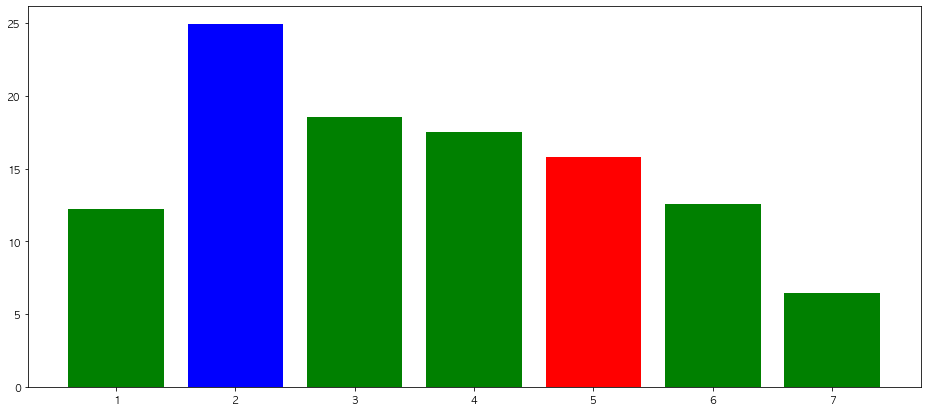

In [402]:
print("해당 가구와 전체 평균 기여도면에서 가장 차이가 많이 나는 요일은 {}요일 입니다.\n".format(DAY_ARR[cont_chk_4.argmax()]))
print("해당 요일의 집계 기여도 평균은 아래와 같습니다.")

cont_day_compare = scc[scc.index.weekday == cont_chk_4.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_day_compare.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_4.argmax()]][sh].mean())

plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )

# 기여도 분석
- 실수로 표기되는 전기 데이터는 통계적으로 보았을 때, 실수이기 때문에 그 수의 범위가 매우 넓다. 때문에, 어느 차이 까지를 임계점으로 잡을지에 대한 경계가 애매하다.
- 기여도 분석은 이 범위를 좁혀준 개념이라고 보면 된다. 시분할 공간 속에서 계속해서 쌓여진 기여도들의 평균을 통해 최종적인 기여도를 산정해낼 수 있고, 이를 정수로 나타내주게 되면, 사용량면에서 최대차이를 보이는 범위는 물론, 위에서 말했던 소수점의 임계부분을 해결을 위한 값을 제공해줄 수 있다. (기여도면에서의 포함 관계에 집중)

# 기여도와 사용량면의 차이

In [403]:
sg = "기여도 그룹 3"
sh = "아파트1-102-403"

print("----선택 정보를 확인해주세요.")
print("그룹 명 : {}".format(sg))
print("가구 명 : {}\n".format(sh))

print("요일 비교 (전체 평균도)")
print("\t• 나의 그룹 •")
cont_chk_1 = cc_day_cont[sg].values - acc_day_cont.values.flatten()
cont_chk_2 = cc_day_usage[sg].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_1)
print("사용량",cont_chk_2)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_1 == cont_chk_1[cont_chk_1.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_2 == cont_chk_2[cont_chk_2.argmax()])[0]]))

print("\n\t• 나 •")
cont_chk_3 = day_cont[sh].values - acc_day_cont.values.flatten()
cont_chk_4 = day_usage[sh].values - acc_day_usage.values.flatten()
print("기여도",cont_chk_3)
print("사용량",cont_chk_4)
print("기여도면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_3 == cont_chk_3[cont_chk_3.argmax()])[0]]))
print("사용량면 최대차이 : {}".format(DAY_ARR[np.where(cont_chk_4 == cont_chk_4[cont_chk_4.argmax()])[0]]))

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 3
가구 명 : 아파트1-102-403

요일 비교 (전체 평균도)
	• 나의 그룹 •
기여도 [ 0. -1. -1. -1.  0.  0.  1.]
사용량 [-0.016 -0.026 -0.017 -0.009  0.005 -0.024 -0.036]
기여도면 최대차이 : ['일']
사용량면 최대차이 : ['금']

	• 나 •
기여도 [ 0.  1. -1.  0.  1.  0.  1.]
사용량 [0.038 0.048 0.04  0.046 0.048 0.053 0.038]
기여도면 최대차이 : ['화' '금' '일']
사용량면 최대차이 : ['토']


- 기여도 평가는 사용량면의 비교와 다른 차이를 보여줄 수 있다.

기여도면에서 최고 차이
	전체 평균 사용량: 0.265kWh
	나의 평균 사용량: 0.313kWh


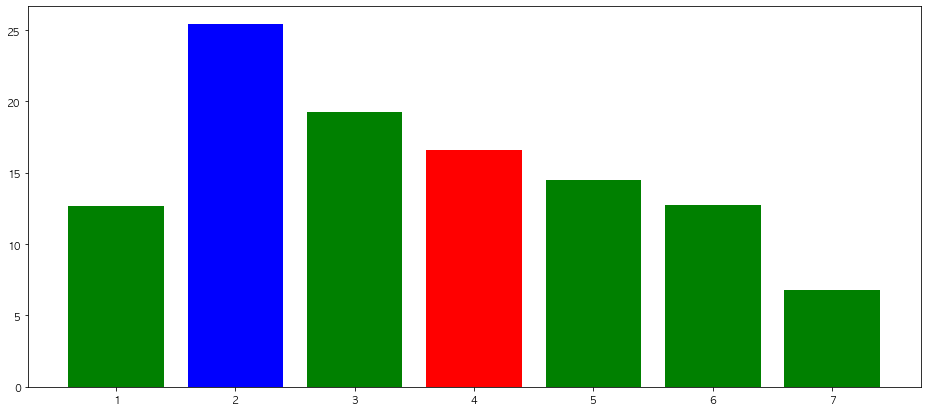

사용량면에서 최고 차이
	전체 평균 사용량: 0.276kWh
	나의 평균 사용량: 0.329kWh


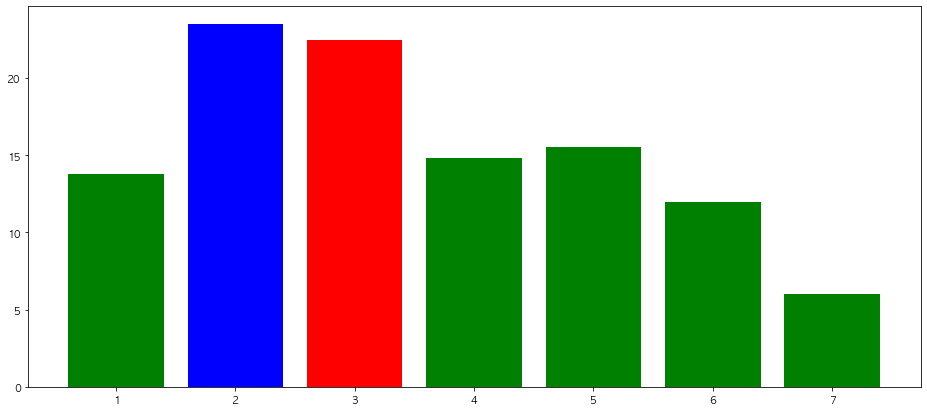

In [404]:
cont_day_compare = scc[scc.index.weekday == cont_chk_3.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_chk_3.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_3.argmax()]][sh].mean())

print("기여도면에서 최고 차이")
print("\t전체 평균 사용량: {}kWh".format(acc_day_usage.iloc[cont_chk_3.argmax()].values[0]))
print("\t나의 평균 사용량: {}kWh".format(day_usage[sh].iloc[cont_chk_3.argmax()]))
plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )
    
plt.show()
    
cont_day_compare = scc[scc.index.weekday == cont_chk_4.argmax()].mean()
general_day_cont = cont_day_compare.keys()[cont_day_compare.argmax()]
target_day_cont = round(contribution_df[day_cols[cont_chk_4.argmax()]][sh].mean())

print("사용량면에서 최고 차이")
print("\t전체 평균 사용량: {}kWh".format(acc_day_usage.iloc[cont_chk_4.argmax()].values[0]))
print("\t나의 평균 사용량: {}kWh".format(day_usage[sh].iloc[cont_chk_4.argmax()]))
plt.figure(figsize=(16,7))

for _ in cont_day_compare.keys():
    plt.bar(_, cont_day_compare[_],color=
            'r' if _ == target_day_cont else 
            'b' if _ == general_day_cont else 'g' )
    
plt.show()

- 기여도는 특정 시간대에 많이 사용하여, 혹은 특정 시간대에 다른 사용자들보다 평균적으로 많이 사용해서 쌓아진 결과이다. 즉, 행동패턴에 기반이 되기 때문에 사용량면에서의 비교와는 차이가 발생할 수 있다. 이는 분산의 차이의 관점으로 볼 수가 있다.

기여도면에서 최고 차이인 화요일
	표준편차: 0.08157779750000001


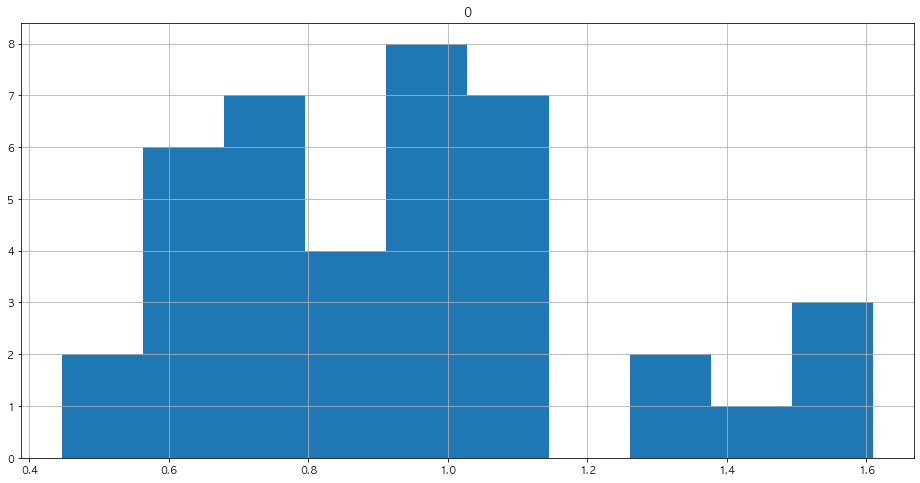


사용량면에서 최고 차이인 토요일
	표준편차: 0.09002960937499999


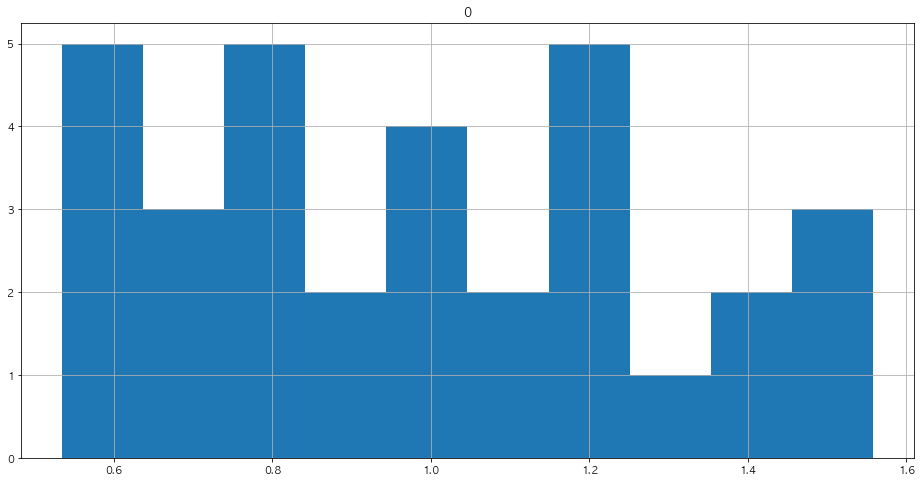

In [405]:
print("기여도면에서 최고 차이인 {}요일".format(DAY_ARR[cont_chk_3.argmax()]))
print("\t표준편차: {}".format(df[sh][all_day_cols[cont_chk_3.argmax()]].values.reshape(-1, size).sum(axis=1).var()))
pd.DataFrame(df[sh][all_day_cols[cont_chk_3.argmax()]].values.reshape(-1, size).sum(axis=1))\
    .hist(figsize=(16,8), bins=10)
plt.show()

print("\n사용량면에서 최고 차이인 {}요일".format(DAY_ARR[cont_chk_4.argmax()]))
print("\t표준편차: {}".format(df[sh][all_day_cols[cont_chk_4.argmax()]].values.reshape(-1, size).sum(axis=1).var()))
pd.DataFrame(df[sh][all_day_cols[cont_chk_4.argmax()]].values.reshape(-1, size).sum(axis=1))\
    .hist(figsize=(16,8), bins=10)
plt.show()

- 해당 가구는 기여도면에서 최고 차이를 보인 화요일이라는 시간에는 본인의 평균 값에 분포 하여 에너지를 소비하였다. 즉, 꾸준히 평균값 만큼 사용한 것이다.
- 사용량면에서 최고 차이를 보인 토요일이라는 시간에는 여러 에너지 사용을 기록했다. 많이 사용한 날도 있는 반면, 적게 사용한 날도 있었다. 즉, 사용량이 일정치 않았다는 것이다. 그렇기에 기여도가 낮게 산정된 시간대가 존재하여, 기여도 산정에서 기여도가 낮게 산정되는 경우가 존재했으며, 이는 최종 기여도 산정에 영향을 미쳤기 때문에 기여도면에서는 해당 날을 잡아내지 못한 것 이다.
- 반대로 기여도는 폭 넓은 임계치를 지원해줄 수 있다는 점을 말했었다. 즉, 기여도로 뽑혀진 값과 사용량으로 뽑혀진 값을 조합하면, 폭 넓은 피드백이 가능해진다는 것 이다. (사용량을 초점을 맞추되, 그외 부가적인 것으로 기여도 분석을 이용)

# 나의 그룹에서의 위치

- 패턴을 클러스터링 하게 되면, 클러스터링 패턴을 기준으로 아래에 존재하는 패턴이 있고, 위에 존재하는 패턴이 있다.

## 요일적 분석

In [406]:
def sel_pos(value):
    if value >= 1:
        return "high"
    elif value == 0:
        return "eq"
    else:
        return "low"
    
def pos_color(value):
    if value == "high":
        return "r"
    elif value == "eq":
        return 'g'
    else:
        return 'b'

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-1505

가구 아파트1-103-1505는 기여도 그룹 5의 ['월' '화' '목' '금' '토' '일']요일에 속해 있습니다.


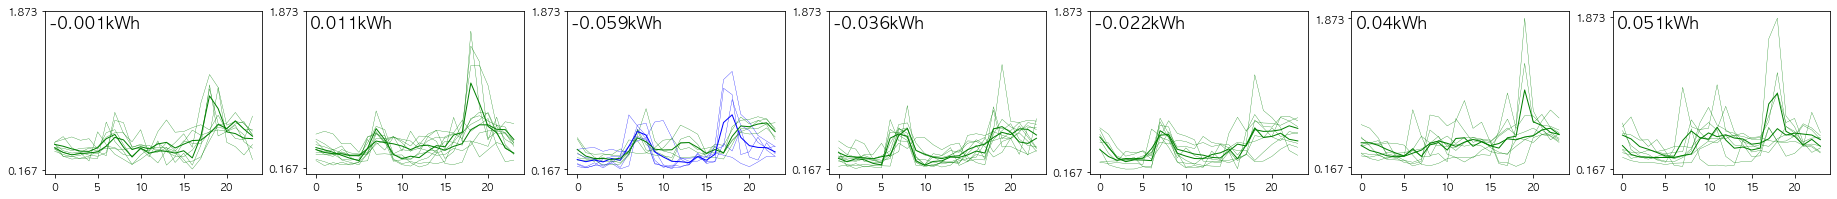

In [407]:
sg, sh = consoling()

# 요일별
err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
err_day_usage = day_usage[sh] - cc_day_usage[sg]

composite_day = err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values

print("가구 {}는 {}의 {}요일에 속해 있습니다.".
     format(sh,sg,err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values))
if len(err_day_cont[err_day_cont == "high"].keys().values) != 0:
    print("그 중 {}요일은 많은 사용량을 보이고 있습니다.".
         format(err_day_cont[err_day_cont == "high"].keys().values))

fig, ax = plt.subplots(1,len(DAY_ARR), figsize=(32, 3))

for weekday,day in enumerate(DAY_ARR):
    day_idx = df.index.weekday == weekday
    
    _c_pattern = cc_pattern[day_idx][sg].values.reshape(-1, 24)
    _h_pattern = df[day_idx][sh].values.reshape(-1, 24)
    
    is_composite = DAY_ARR[weekday] in composite_day
    is_high = err_day_cont[DAY_ARR[weekday]] == "high"
    _level = err_day_cont[DAY_ARR[weekday]]
    
    for pat_idx, h_pat in enumerate(_h_pattern):
        c_pat = _c_pattern[pat_idx]
        ax[weekday].plot(h_pat, color=pos_color(_level), linewidth=0.3)
        ax[weekday].plot(c_pat, color='g', linewidth=0.3)
        
    ax[weekday].text(0.02, 0.925, "{}kWh".format(
                round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                ha="left",
                va="center",
                transform=ax[weekday].transAxes,
                fontsize=16)
    ax[weekday].plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
    ax[weekday].plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
    ax[weekday].set_yticks([df[sh].min(), df[sh].max()])

## 시간적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-102-501

가구 아파트1-102-501는 기여도 그룹 5의 ['0시 ~ 2시' '3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시' '15시 ~ 17시'
 '21시 ~ 23시']시간대에 속해 있습니다.
그 중 ['3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시']시간대는 많은 사용량을 보이고 있습니다.


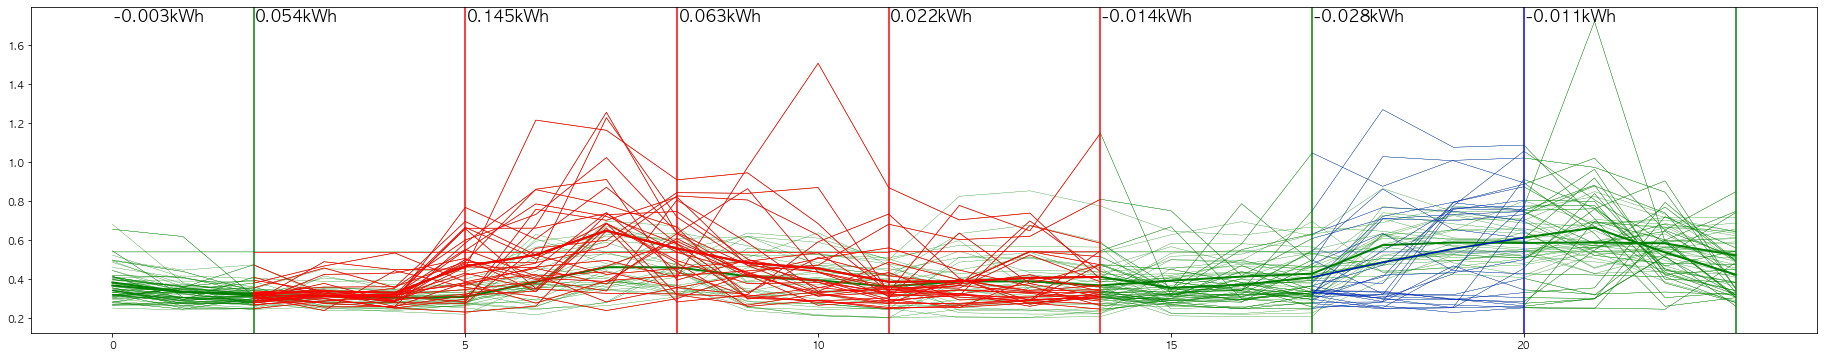

In [180]:
sg, sh = consoling()

# 시간별
err_time_cont = (time_cont[sh] - cc_time_cont[sg]).map(lambda x: sel_pos(x))
err_time_usage = time_usage[sh] - cc_time_usage[sg]

composite_time = err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values

print("가구 {}는 {}의 {}시간대에 속해 있습니다.".
     format(sh,sg,err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values))
if len(err_time_cont[err_time_cont == "high"].keys().values) != 0:
    print("그 중 {}시간대는 많은 사용량을 보이고 있습니다.".
         format(err_time_cont[err_time_cont == "high"].keys().values))
    
_c_pattern = cc_pattern[sg].values.reshape(-1,24)
_h_pattern = df[sh].values.reshape(-1, 24)

plt.figure(figsize=(32,6))
for pat_idx, h_pat in enumerate(_h_pattern):
    c_pat = _c_pattern[pat_idx]
    plt.plot(h_pat, color='g', linewidth=0.3)
    plt.plot(c_pat, color='g', linewidth=0.3)
    
plt.plot(_h_pattern.mean(axis=0), color='g', linewidth=2)
plt.plot(_c_pattern.mean(axis=0), color='g', linewidth=2)

max_kwh = _h_pattern.max() if _h_pattern.max() > _c_pattern.max() else _c_pattern.max()

for idx,time in enumerate(range(2, 24, 3)):
    time_kor = TIME_KOR_STR[idx]
    is_composite = time_kor in composite_time
    is_high = err_time_cont[time_kor] == "high"
    _level = err_time_cont[time_kor]
    
    plt.axvline(time, color=pos_color(_level))
    

    start_time = time - 3
    start_time = 0 if start_time < 0 else start_time

    end_time = time + 1

    _time_h_pattern = _h_pattern[:, start_time: end_time]
    _time_c_pattern = _c_pattern[:, start_time: end_time]
    
    plt.text(start_time + 0.02, max_kwh, "{}kWh".format(
                round((_time_h_pattern.mean() - _time_c_pattern.mean()) * 1000) / 1000),
            fontsize=16)
    for pat_idx, h_pat in enumerate(_time_h_pattern):
        plt.plot(range(start_time, end_time), h_pat, color=pos_color(_level), linewidth=0.75 if is_high else 0.3)

    plt.plot(range(start_time, end_time), _time_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=2 if is_high else 1)

# 이전 기여도 그룹과의 비교

## 요일적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-102-501

가구 아파트1-102-501의 이전 기여도 그룹 4의 ['월' '화' '수' '목' '금' '토' '일']요일에 속해 있습니다.
그 중 ['월' '화' '수' '목' '토' '일']요일은 많은 사용량을 보이고 있습니다.


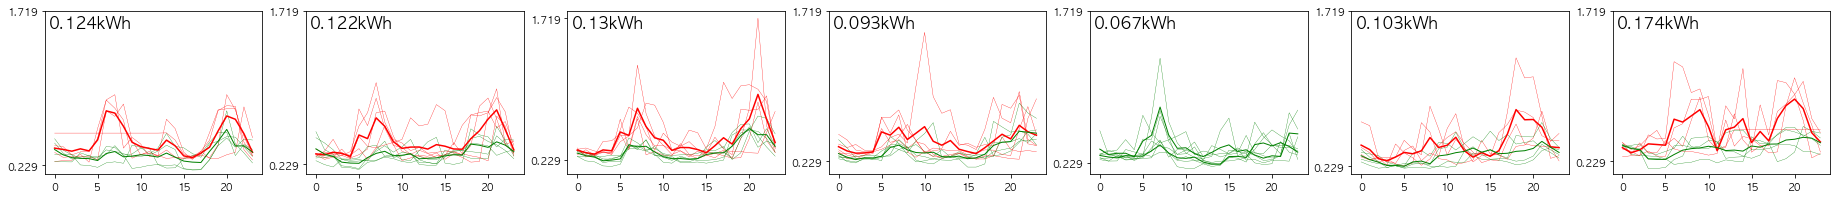

In [182]:
sg, sh = consoling()
sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

# 요일별
err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
err_day_usage = day_usage[sh] - cc_day_usage[sg]

composite_day = err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values

print("가구 {}의 이전 {}의 {}요일에 속해 있습니다.".
     format(sh,sg,err_day_cont[(err_day_cont == "eq") | (err_day_cont == "high")].keys().values))
if len(err_day_cont[err_day_cont == "high"].keys().values) != 0:
    print("그 중 {}요일은 많은 사용량을 보이고 있습니다.".
         format(err_day_cont[err_day_cont == "high"].keys().values))

fig, ax = plt.subplots(1,len(DAY_ARR), figsize=(32, 3))

for weekday,day in enumerate(DAY_ARR):
    day_idx = df.index.weekday == weekday
    
    _c_pattern = cc_pattern[day_idx][sg].values.reshape(-1, 24)
    _h_pattern = df[day_idx][sh].values.reshape(-1, 24)
    
    is_composite = DAY_ARR[weekday] in composite_day
    is_high = err_day_cont[DAY_ARR[weekday]] == "high"
    _level = err_day_cont[DAY_ARR[weekday]]
    
    for pat_idx, h_pat in enumerate(_h_pattern):
        c_pat = _c_pattern[pat_idx]
        ax[weekday].plot(h_pat, color=pos_color(_level), linewidth=0.3)
        ax[weekday].plot(c_pat, color='g', linewidth=0.3)
        
    ax[weekday].text(0.02, 0.925, "{}kWh".format(
                round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                ha="left",
                va="center",
                transform=ax[weekday].transAxes,
                fontsize=16)
    ax[weekday].plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
    ax[weekday].plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
    ax[weekday].set_yticks([df[sh].min(), df[sh].max()])

## 시간적 분석

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-102-501

가구 아파트1-102-501 이전 기여도 그룹 4의 ['0시 ~ 2시' '3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시' '15시 ~ 17시'
 '18시 ~ 20시' '21시 ~ 23시']시간대에 속해 있습니다.
그 중 ['0시 ~ 2시' '3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시' '15시 ~ 17시'
 '21시 ~ 23시']시간대는 많은 사용량을 보이고 있습니다.


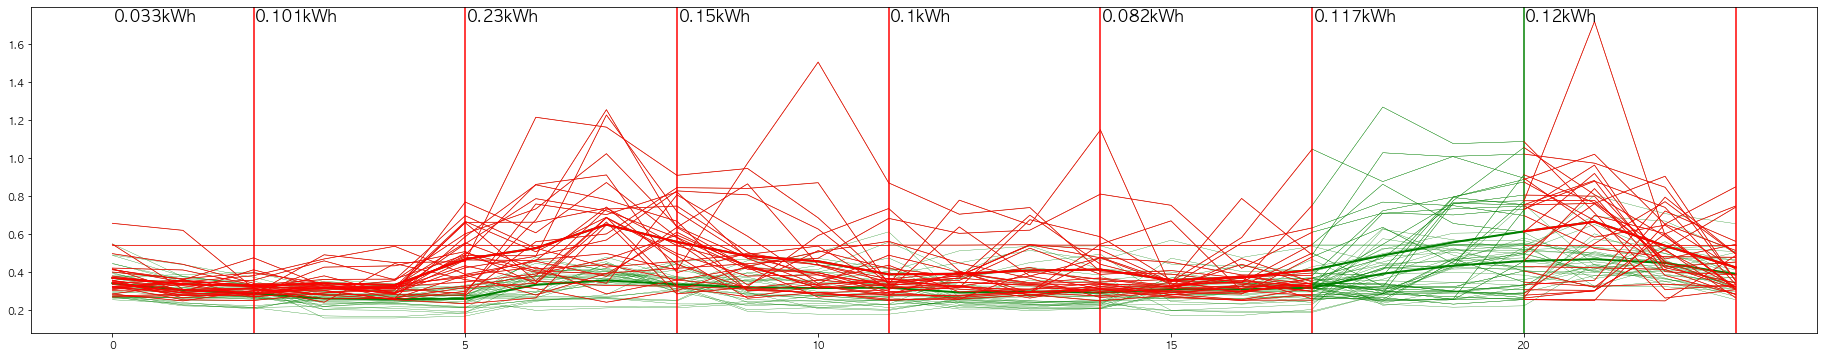

In [183]:
sg, sh = consoling()
sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

# 시간별
err_time_cont = (time_cont[sh] - cc_time_cont[sg]).map(lambda x: sel_pos(x))
err_time_usage = time_usage[sh] - cc_time_usage[sg]

composite_time = err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values

print("가구 {} 이전 {}의 {}시간대에 속해 있습니다.".
     format(sh,sg,err_time_cont[(err_time_cont == "eq") | (err_time_cont == "high")].keys().values))
if len(err_time_cont[err_time_cont == "high"].keys().values) != 0:
    print("그 중 {}시간대는 많은 사용량을 보이고 있습니다.".
         format(err_time_cont[err_time_cont == "high"].keys().values))
    
_c_pattern = cc_pattern[sg].values.reshape(-1,24)
_h_pattern = df[sh].values.reshape(-1, 24)

plt.figure(figsize=(32,6))
for pat_idx, h_pat in enumerate(_h_pattern):
    c_pat = _c_pattern[pat_idx]
    plt.plot(h_pat, color='g', linewidth=0.3)
    plt.plot(c_pat, color='g', linewidth=0.3)
    
plt.plot(_h_pattern.mean(axis=0), color='g', linewidth=2)
plt.plot(_c_pattern.mean(axis=0), color='g', linewidth=2)

max_kwh = _h_pattern.max() if _h_pattern.max() > _c_pattern.max() else _c_pattern.max()

for idx,time in enumerate(range(2, 24, 3)):
    time_kor = TIME_KOR_STR[idx]
    is_composite = time_kor in composite_time
    is_high = err_time_cont[time_kor] == "high"
    _level = err_time_cont[time_kor]
    
    plt.axvline(time, color=pos_color(_level))
    

    start_time = time - 3
    start_time = 0 if start_time < 0 else start_time

    end_time = time + 1

    _time_h_pattern = _h_pattern[:, start_time: end_time]
    _time_c_pattern = _c_pattern[:, start_time: end_time]
    
    plt.text(start_time + 0.02, max_kwh, "{}kWh".format(
                round((_time_h_pattern.mean() - _time_c_pattern.mean()) * 1000) / 1000),
            fontsize=16)
    for pat_idx, h_pat in enumerate(_time_h_pattern):
        plt.plot(range(start_time, end_time), h_pat, color=pos_color(_level), linewidth=0.75 if is_high else 0.3)

    plt.plot(range(start_time, end_time), _time_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=2 if is_high else 1)

# 전기절약 시뮬레이션 (한 가구)

In [271]:
def set_target(cont_info, groups):
    now_cont, prev_cont = cont_info
    sg, prev_sg = groups
    
    if now_cont == "high":
        return sg
    elif now_cont == "eq":
        if prev_cont == "high":
            return prev_sg
        else:
            return "-"
    elif now_cont == "low":
        if prev_cont == "high":
            return prev_sg
        else:
            return "-"

## 요일 시뮬레이션

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-103-106


  현재 기여도 그룹 이전 기여도 그룹     적용 타겟
월       low        eq         -
화       low        eq         -
수      high      high  기여도 그룹 5
목      high      high  기여도 그룹 5
금        eq      high  기여도 그룹 4
토       low       low         -
일       low       low         -

가구 아파트1-103-106의 기여도 그룹 5에 속해있으며 ['수' '목']요일은 그룹내에서 상대적으로 많은 사용량을 보이고 있습니다. 
그룹 내의 전기절약을 실천합시다.


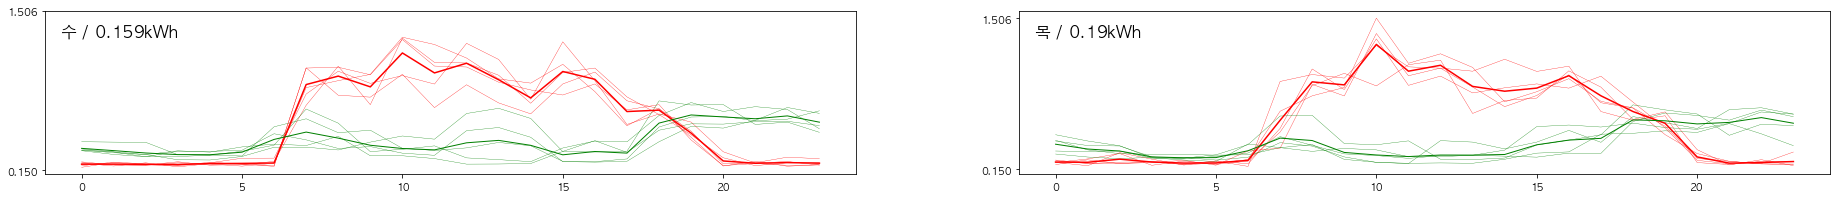

['금'] 요일은 현재 그룹 내에서 평균값을 사용하고 있으나, 전 그룹에 비해 많은 사용량을 보이고 있습니다. 
이전 그룹의 사용량 만큼 전기절약을 실천합시다.


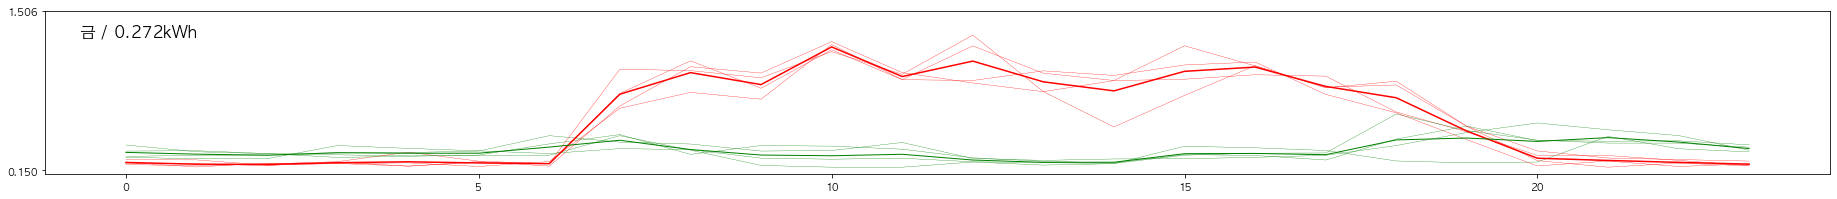

['월' '화' '토' '일'] 요일은 전기절약을 잘 실천하고 계십니다.

피드백 적용 전 총 사용량: 330kWh
피드백 적용 후 총 사용량: 262kWh


In [304]:
sg, sh = consoling()
prev_sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

# 요일별
err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
err_day_cont_prev = (day_cont[sh] - cc_day_cont[prev_sg]).map(lambda x: sel_pos(x))

err_day = pd.concat([err_day_cont, err_day_cont_prev], axis=1)
err_day.columns = ['현재 기여도 그룹', '이전 기여도 그룹']
err_day['적용 타겟']  = [set_target(_, [sg, prev_sg]) for _ in err_day.values]

_bak_feedback = df[sh].copy()
feedback = _bak_feedback.copy()

print("\n{}\n".format(err_day))

for weekday,target in enumerate(err_day['적용 타겟']):
    weekday_idx = cc_pattern.index.weekday == weekday
    
    if target == "-":
        continue
    else:
        feedback[weekday_idx] = cc_pattern[target][weekday_idx]

print("가구 {}의 {}에 속해있으며 {}요일은 그룹내에서 상대적으로 많은 사용량을 보이고 있습니다.".
    format(sh,sg,err_day_cont[(err_day_cont == "high")].keys().values), 
      "\n그룹 내의 전기절약을 실천합시다.")

now_target = err_day[err_day['적용 타겟'] == sg]
if len(now_target) != 0 :
    fig, ax = plt.subplots(1,len(now_target), figsize=(32, 3))

    for idx,day in enumerate(now_target.index):
        _ax = ax if len(now_target) == 1 else ax[idx]
        weekday = np.where(DAY_ARR == day)[0][0]
        day_idx = df.index.weekday == weekday

        _c_pattern = cc_pattern[day_idx][sg].values.reshape(-1, 24)
        _h_pattern = df[day_idx][sh].values.reshape(-1, 24)

        _level = err_day_cont[DAY_ARR[weekday]]
    
        for pat_idx, h_pat in enumerate(_h_pattern):
            c_pat = _c_pattern[pat_idx]
            
            _ax.plot(h_pat, color=pos_color(_level), linewidth=0.3)
            _ax.plot(c_pat, color='g', linewidth=0.3)


        _ax.text(0.02, 0.875, "{} / {}kWh".format(
                    day,
                    round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                    ha="left",
                    va="center",
                    transform=_ax.transAxes,
                    fontsize=16)
        _ax.plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
        _ax.plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
        _ax.set_yticks([df[sh].min(), df[sh].max()])

    plt.show()

print("{} 요일은 현재 그룹 내에서 평균값을 사용하고 있으나, 전 그룹에 비해 많은 사용량을 보이고 있습니다.".
     format(err_day[err_day['적용 타겟'] == prev_sg].index.values), 
      "\n이전 그룹의 사용량 만큼 전기절약을 실천합시다.")

prev_target = err_day[err_day['적용 타겟'] == prev_sg]

if len(prev_target) != 0:
    fig, ax = plt.subplots(1,len(prev_target), figsize=(32, 3))

    for idx,day in enumerate(prev_target.index):
        _ax = ax if len(prev_target) == 1 else ax[idx]
        weekday = np.where(DAY_ARR == day)[0][0]
        day_idx = df.index.weekday == weekday

        _c_pattern = cc_pattern[day_idx][prev_sg].values.reshape(-1, 24)
        _h_pattern = df[day_idx][sh].values.reshape(-1, 24)

        _level = err_day_cont_prev[DAY_ARR[weekday]]

        for pat_idx, h_pat in enumerate(_h_pattern):
            c_pat = _c_pattern[pat_idx]
            _ax.plot(h_pat, color=pos_color(_level), linewidth=0.3)
            _ax.plot(c_pat, color='g', linewidth=0.3)

        _ax.text(0.02, 0.875, "{} / {}kWh".format(
                    day,
                    round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                    ha="left",
                    va="center",
                    transform=_ax.transAxes,
                    fontsize=16)
        _ax.plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
        _ax.plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
        _ax.set_yticks([df[sh].min(), df[sh].max()])

    plt.show()

print("{} 요일은 전기절약을 잘 실천하고 계십니다.".
     format(err_day[err_day['적용 타겟'] == "-"].index.values))
    
print("\n피드백 적용 전 총 사용량: {}kWh".format(_bak_feedback.sum().round().astype("int")))
print("피드백 적용 후 총 사용량: {}kWh".format(feedback.sum().round().astype("int")))

## 시간 시뮬레이션

----선택 정보를 확인해주세요.
그룹 명 : 기여도 그룹 5
가구 명 : 아파트1-102-501


          현재 기여도 그룹 이전 기여도 그룹     적용 타겟
0시 ~ 2시          eq      high  기여도 그룹 4
3시 ~ 5시        high      high  기여도 그룹 5
6시 ~ 8시        high      high  기여도 그룹 5
9시 ~ 11시       high      high  기여도 그룹 5
12시 ~ 14시      high      high  기여도 그룹 5
15시 ~ 17시        eq      high  기여도 그룹 4
18시 ~ 20시       low        eq         -
21시 ~ 23시        eq      high  기여도 그룹 4

가구 아파트1-102-501의 기여도 그룹 5에 속해있으며 ['3시 ~ 5시' '6시 ~ 8시' '9시 ~ 11시' '12시 ~ 14시']시간대는 그룹내에서 상대적으로 많은 사용량을 보이고 있습니다. 
그룹 내의 전기절약을 실천합시다.


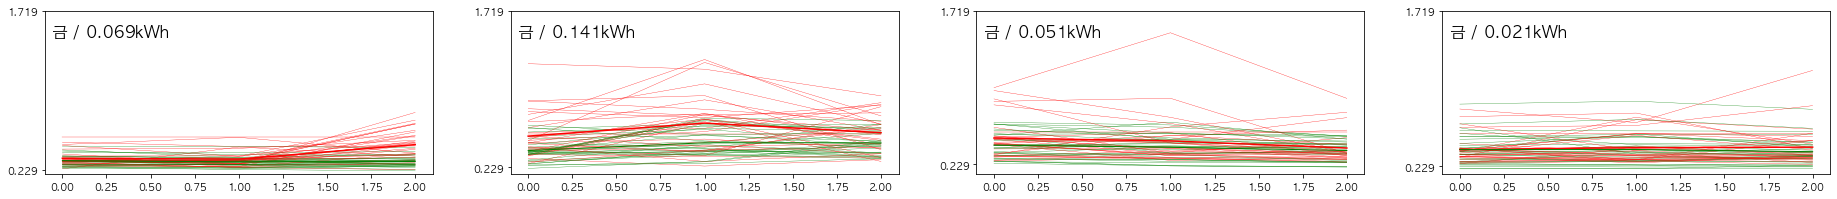

['0시 ~ 2시' '15시 ~ 17시' '21시 ~ 23시'] 시간대는 현재 그룹 내에서 평균값을 사용하고 있으나, 전 그룹에 비해 많은 사용량을 보이고 있습니다. 
이전 그룹의 사용량 만큼 전기절약을 실천합시다.


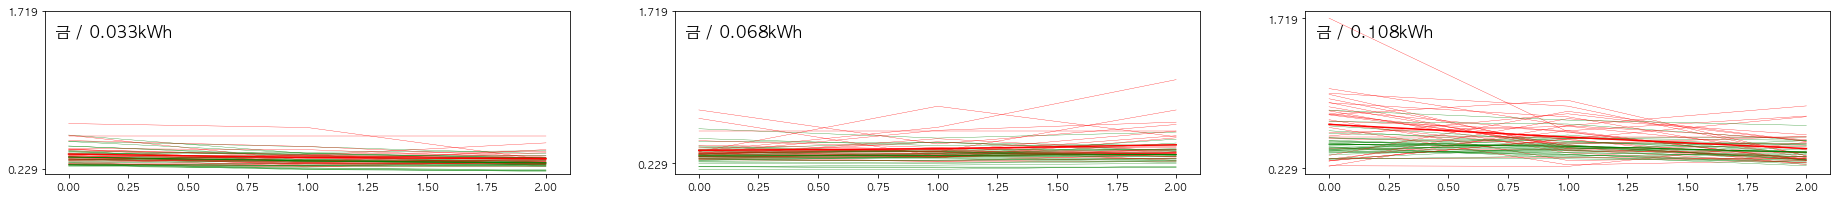

['18시 ~ 20시'] 시간대는 전기절약을 잘 실천하고 계십니다.

피드백 적용 전 총 사용량: 336kWh
피드백 적용 후 총 사용량: 213kWh


In [321]:
sg, sh = consoling()
prev_sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

err_time_cont = (time_cont[sh] - cc_time_cont[sg]).map(lambda x: sel_pos(x))
err_time_cont_prev = (time_cont[sh] - cc_time_cont[prev_sg]).map(lambda x: sel_pos(x))

err_time = pd.concat([err_time_cont, err_time_cont_prev], axis=1)
err_time.columns = ['현재 기여도 그룹', '이전 기여도 그룹']
err_time['적용 타겟']  = [set_target(_, [sg, prev_sg]) for _ in err_time.values]

_bak_feedback = df[sh].copy()
feedback = _bak_feedback.copy()

print("\n{}\n".format(err_time))

for _time_idx,target in enumerate(err_day['적용 타겟']):
    time_idx = all_time_cols[_time_idx]
    
    if target == "-":
        continue
    else:
        feedback[time_idx] = cc_pattern[target][time_idx]
        
print("가구 {}의 {}에 속해있으며 {}시간대는 그룹내에서 상대적으로 많은 사용량을 보이고 있습니다.".
    format(sh,sg,err_time_cont[(err_time_cont == "high")].keys().values), 
      "\n그룹 내의 전기절약을 실천합시다.")

now_target = err_time[err_time['적용 타겟'] == sg]
if len(now_target) != 0 :
    fig, ax = plt.subplots(1,len(now_target), figsize=(32, 3))

    for idx,_time in enumerate(now_target.index):
        _ax = ax if len(now_target) == 1 else ax[idx]
    
        _time_idx = np.where(TIME_KOR_STR == _time)[0][0]
        time_idx = all_time_cols[_time_idx]

        _c_pattern = cc_pattern[time_idx][sg].values.reshape(-1, size)
        _h_pattern = df[time_idx][sh].values.reshape(-1, size)

        _level = err_time_cont[TIME_KOR_STR[_time_idx]]
    
        for pat_idx, h_pat in enumerate(_h_pattern):
            c_pat = _c_pattern[pat_idx]
            
            _ax.plot(h_pat, color=pos_color(_level), linewidth=0.3)
            _ax.plot(c_pat, color='g', linewidth=0.3)


        _ax.text(0.02, 0.875, "{} / {}kWh".format(
                    day,
                    round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                    ha="left",
                    va="center",
                    transform=_ax.transAxes,
                    fontsize=16)
        _ax.plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
        _ax.plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
        _ax.set_yticks([df[sh].min(), df[sh].max()])

    plt.show()
    
print("{} 시간대는 현재 그룹 내에서 평균값을 사용하고 있으나, 전 그룹에 비해 많은 사용량을 보이고 있습니다.".
     format(err_time[err_time['적용 타겟'] == prev_sg].index.values), 
      "\n이전 그룹의 사용량 만큼 전기절약을 실천합시다.")

prev_target = err_time[err_time['적용 타겟'] == prev_sg]

if len(prev_target) != 0:
    fig, ax = plt.subplots(1,len(prev_target), figsize=(32, 3))

    for idx,_time in enumerate(prev_target.index):
        _ax = ax if len(prev_target) == 1 else ax[idx]
    
        _time_idx = np.where(TIME_KOR_STR == _time)[0][0]
        time_idx = all_time_cols[_time_idx]

        _c_pattern = cc_pattern[time_idx][prev_sg].values.reshape(-1, size)
        _h_pattern = df[time_idx][sh].values.reshape(-1, size)

        _level = err_time_cont_prev[TIME_KOR_STR[_time_idx]]
    
        for pat_idx, h_pat in enumerate(_h_pattern):
            c_pat = _c_pattern[pat_idx]
            
            _ax.plot(h_pat, color=pos_color(_level), linewidth=0.3)
            _ax.plot(c_pat, color='g', linewidth=0.3)


        _ax.text(0.02, 0.875, "{} / {}kWh".format(
                    day,
                    round((_h_pattern.mean() - _c_pattern.mean()) * 1000) / 1000),
                    ha="left",
                    va="center",
                    transform=_ax.transAxes,
                    fontsize=16)
        _ax.plot(_h_pattern.mean(axis=0), color=pos_color(_level), linewidth=1.5 if is_high else 1)
        _ax.plot(_c_pattern.mean(axis=0), color='g', linewidth=1)
        _ax.set_yticks([df[sh].min(), df[sh].max()])

    plt.show()
    
print("{} 시간대는 전기절약을 잘 실천하고 계십니다.".
     format(err_time[err_time['적용 타겟'] == "-"].index.values))
        
print("\n피드백 적용 전 총 사용량: {}kWh".format(_bak_feedback.sum().round().astype("int")))
print("피드백 적용 후 총 사용량: {}kWh".format(feedback.sum().round().astype("int")))

# 전기절약 시뮬레이션 전체가구

### 요일

In [408]:
_bak_feedback = df.copy()
_day_feedback = _bak_feedback.copy()

for hh_idx in cont_mean_df[cont_mean_df['contribution'] >= 2].index:
    sh = hh_idx
    sg = cc_cols[int(cont_mean_df.loc[hh_idx]['contribution']) - 1]
    prev_sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

    # 요일별
    err_day_cont = (day_cont[sh] - cc_day_cont[sg]).map(lambda x: sel_pos(x))
    err_day_cont_prev = (day_cont[sh] - cc_day_cont[prev_sg]).map(lambda x: sel_pos(x))

    err_day = pd.concat([err_day_cont, err_day_cont_prev], axis=1)
    err_day.columns = ['현재 기여도 그룹', '이전 기여도 그룹']
    err_day['적용 타겟']  = [set_target(_, [sg, prev_sg]) for _ in err_day.values]

    for weekday,target in enumerate(err_day['적용 타겟']):
        weekday_idx = cc_pattern.index.weekday == weekday

        if target == "-":
            continue
        else:
            _day_feedback[sh][weekday_idx] = cc_pattern[target][weekday_idx]
            
print("현재 총 사용량 : {}kWh".format(format(df.sum().sum().round().astype("int"), ",")))
print("피드백 진행 기대 사용량 : {}kWh".format(format(_day_feedback.sum().sum().round().astype("int"), ",")))

현재 총 사용량 : 25,867kWh
피드백 진행 기대 사용량 : 19,482kWh


### 시간

In [409]:
_bak_feedback = df.copy()
_time_feedback = _bak_feedback.copy()

for hh_idx in cont_mean_df[cont_mean_df['contribution'] >= 2].index:
    sh = hh_idx
    sg = cc_cols[int(cont_mean_df.loc[hh_idx]['contribution']) - 1]
    prev_sg = cc_cols[int(cont_mean_df.loc[sh]['contribution']) - 2]

    err_time_cont = (time_cont[sh] - cc_time_cont[sg]).map(lambda x: sel_pos(x))
    err_time_cont_prev = (time_cont[sh] - cc_time_cont[prev_sg]).map(lambda x: sel_pos(x))

    err_time = pd.concat([err_time_cont, err_time_cont_prev], axis=1)
    err_time.columns = ['현재 기여도 그룹', '이전 기여도 그룹']
    err_time['적용 타겟']  = [set_target(_, [sg, prev_sg]) for _ in err_time.values]

    _bak_feedback = df[sh].copy()
    for _time_idx,target in enumerate(err_day['적용 타겟']):
        time_idx = all_time_cols[_time_idx]

        if target == "-":
            continue
        else:
            _time_feedback[sh][time_idx] = cc_pattern[target][time_idx]

현재 총 사용량 : 25,867kWh
피드백 진행 기대 사용량 : 20,840kWh


## 시각화

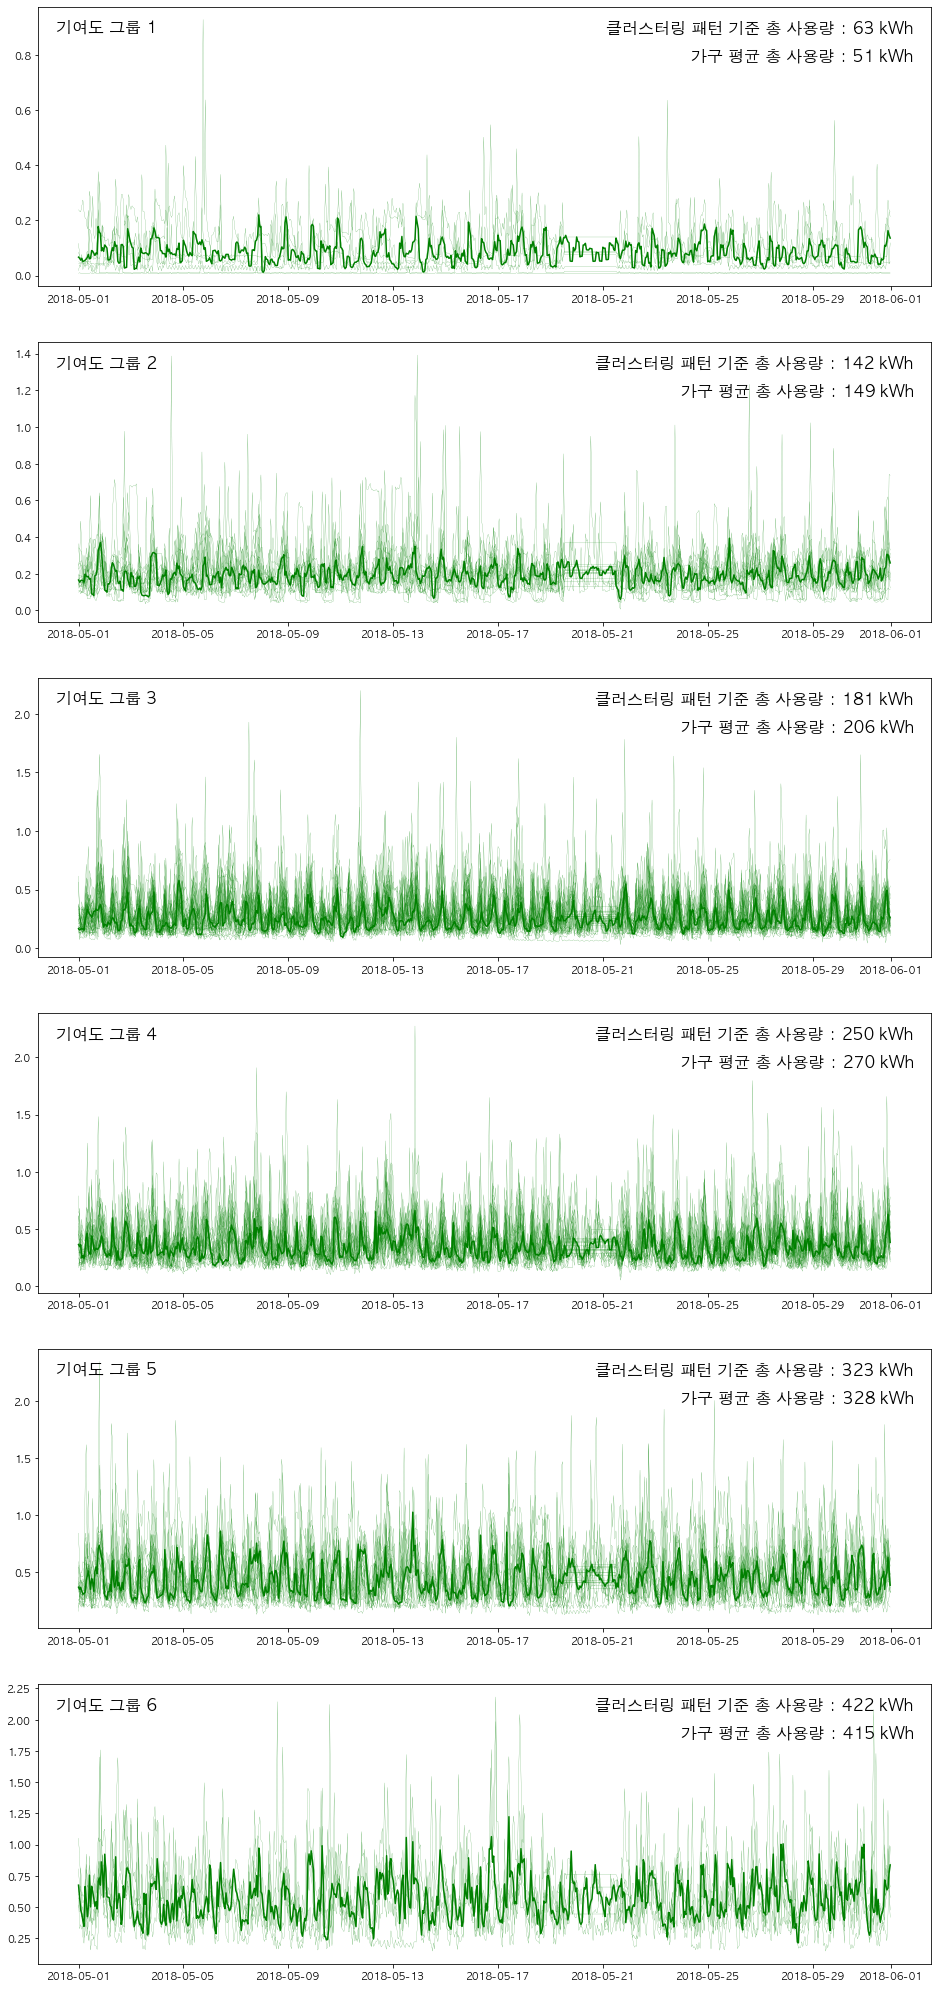

In [419]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(df[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.02, 0.925, cc_cols[group_idx], 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.925, "클러스터링 패턴 기준 총 사용량 : {} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.825, "가구 평균 총 사용량 : {} kWh".format(round(df[_group_cols].sum().mean())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

### 요일 변화

현재 총 사용량 : 25,867kWh
피드백 진행 기대 사용량 : 19,482kWh


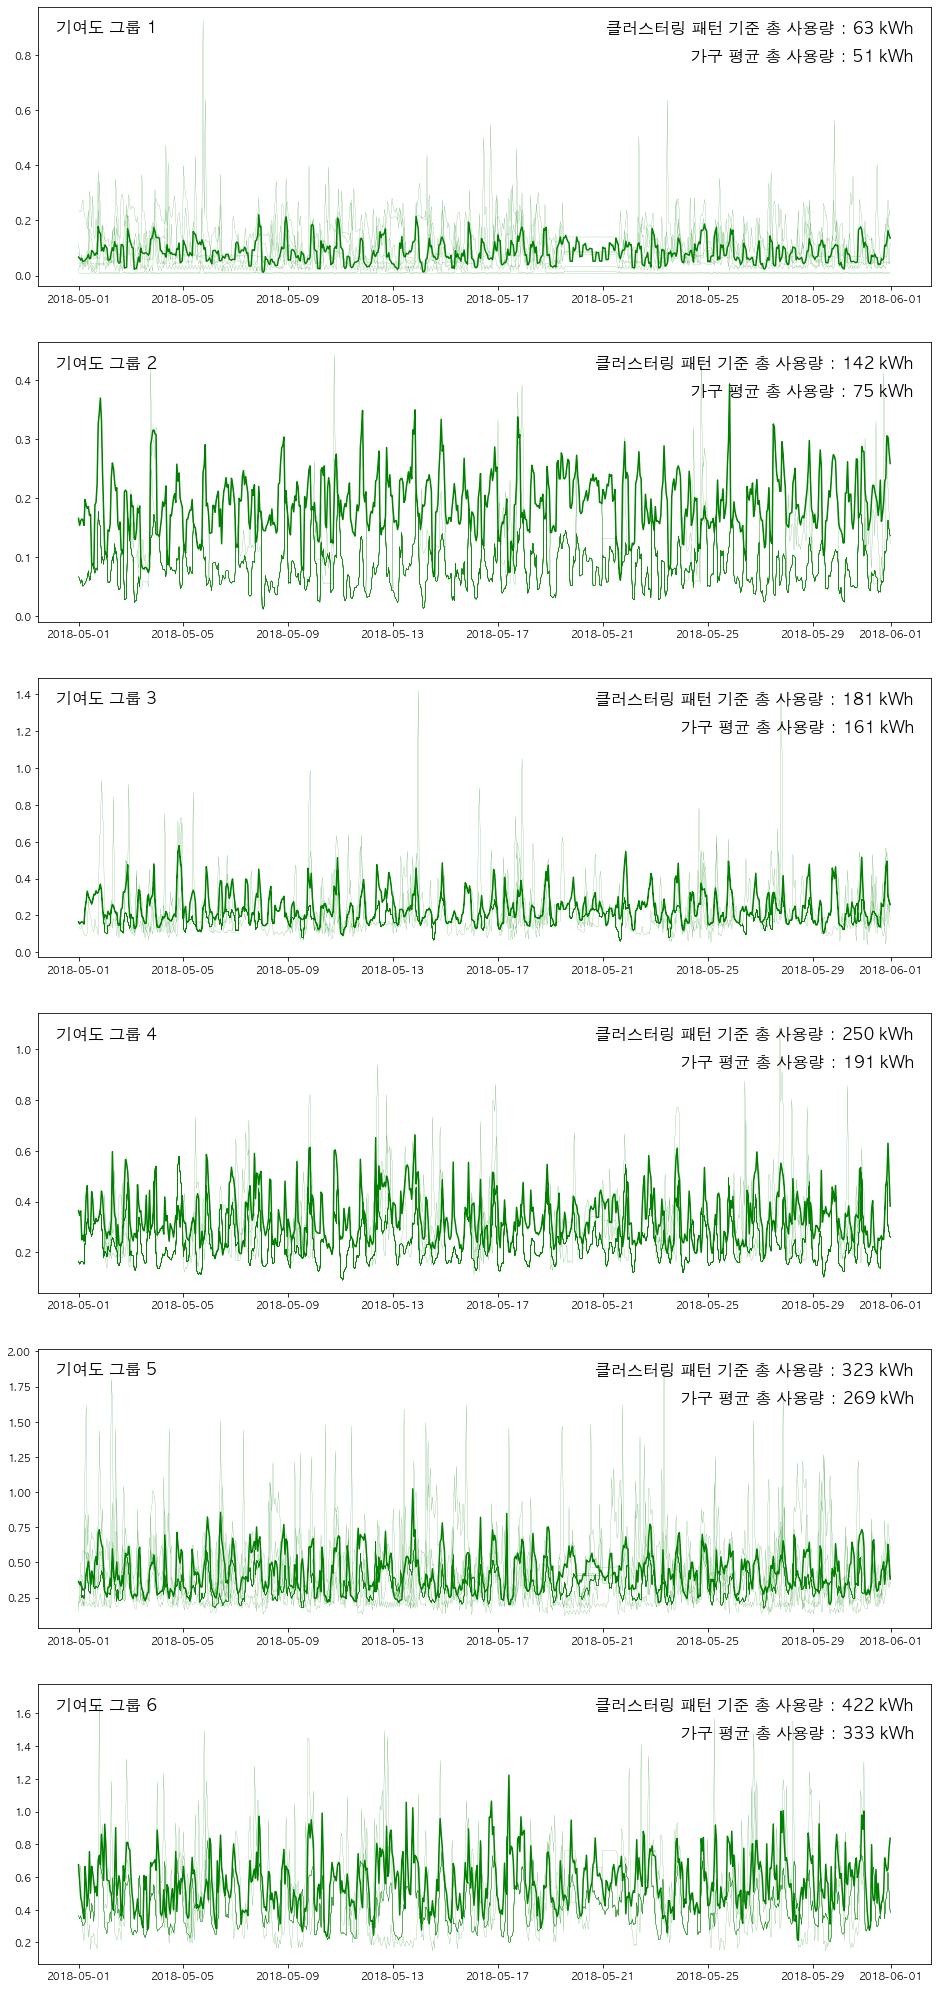

In [420]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(_day_feedback[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.02, 0.925, cc_cols[group_idx], 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.925, "클러스터링 패턴 기준 총 사용량 : {} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.825, "가구 평균 총 사용량 : {} kWh".format(round(_day_feedback[_group_cols].sum().mean())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

print("현재 총 사용량 : {}kWh".format(format(df.sum().sum().round().astype("int"), ",")))
print("피드백 진행 기대 사용량 : {}kWh".format(format(_day_feedback.sum().sum().round().astype("int"), ",")))

plt.show()

### 시간 변화

현재 총 사용량 : 25,867kWh
피드백 진행 기대 사용량 : 20,840kWh


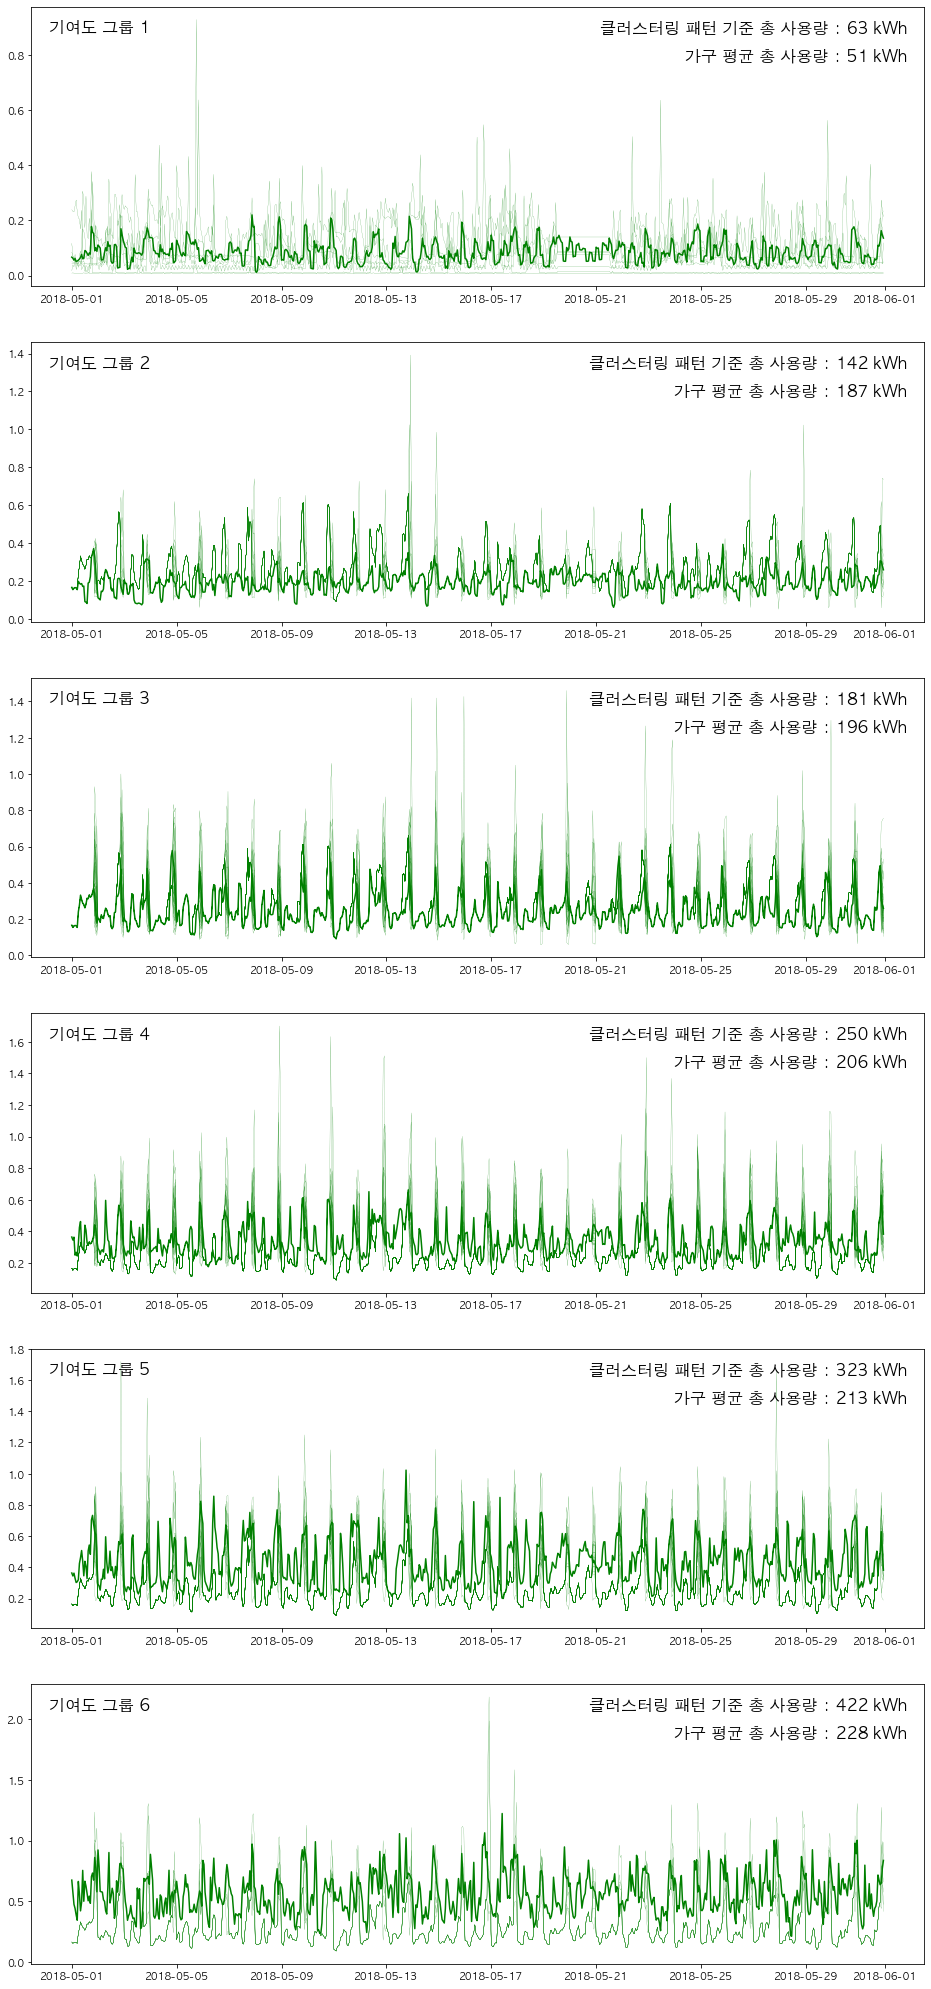

In [421]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(_time_feedback[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.02, 0.925, cc_cols[group_idx], 
                       ha='left', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.925, "클러스터링 패턴 기준 총 사용량 : {} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.98, 0.825, "가구 평균 총 사용량 : {} kWh".format(round(_time_feedback[_group_cols].sum().mean())), 
                       ha='right', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    
print("현재 총 사용량 : {}kWh".format(format(df.sum().sum().round().astype("int"), ",")))
print("피드백 진행 기대 사용량 : {}kWh".format(format(_time_feedback.sum().sum().round().astype("int"), ",")))

plt.show()

## CRS 연계

In [445]:
month_df = pd.DataFrame(df.sum().round().astype("int"))
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']
month_df.head()

PUBLIC_PERCENTAGE = 25
month = df.index[0].month
households_kWh = month_df['usage (kWh)'].sum()
APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))
public_kWh = APT - households_kWh

print("아파트 정보")
print("- 세대부 사용량 : {}kWh".format(format(households_kWh, ",")))
print("- 공용부 사용량 : {}kWh\n".format(format(public_kWh, ",")))

# 단일계약
single_calc = crs.models.ManagementOffice(
    month=month,
    households=month_df,
    APT=APT,
    contract="단일계약"
)


og_bill_df = pd.DataFrame([[hh.name, hh.bill, hh.public_fee] for hh in single_calc.households],
                       columns=["name", "최종청구금액", "공동설비요금"])
og_bill_df.set_index("name", inplace=True)

print("요금 정보")
print("- 아파트전체요금 : {}원".format(format(og_bill_df['최종청구금액'].sum(), ",")))
print("- 공동설비사용요금 : {}원".format(format(og_bill_df['공동설비요금'].sum(), ",")))

og_bill_df.head()

아파트 정보
- 세대부 사용량 : 25,867kWh
- 공용부 사용량 : 8,622kWh

요금 정보
- 아파트전체요금 : 4,124,226원
- 공동설비사용요금 : 1,344,816원


,최종청구금액,공동설비요금
name,,
아파트1-104-1206,24612,12452
아파트1-104-303,23322,12452
아파트1-104-1307,24272,12452
아파트1-104-1208,13582,12452
아파트1-104-408,16872,12452


In [446]:
month_df = pd.DataFrame(_day_feedback.sum().round().astype("int"))
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']
month_df.head()

month = _day_feedback.index[0].month
households_kWh = month_df['usage (kWh)'].sum()
APT = households_kWh + public_kWh

print("아파트 정보")
print("- 세대부 사용량 : {}kWh".format(format(households_kWh, ",")))
print("- 공용부 사용량 : {}kWh\n".format(format(public_kWh, ",")))

# 단일계약
single_calc = crs.models.ManagementOffice(
    month=month,
    households=month_df,
    APT=APT,
    contract="단일계약"
)


dfb_bill_df = pd.DataFrame([[hh.name, hh.bill, hh.public_fee] for hh in single_calc.households],
                       columns=["name", "최종청구금액", "공동설비요금"])
dfb_bill_df.set_index("name", inplace=True)

print("요금 정보")
print("- 아파트전체요금 : {}원".format(format(dfb_bill_df['최종청구금액'].sum(), ",")))
print("- 공동설비사용요금 : {}원".format(format(dfb_bill_df['공동설비요금'].sum(), ",")))

dfb_bill_df.head()

아파트 정보
- 세대부 사용량 : 19,483kWh
- 공용부 사용량 : 8,622kWh

요금 정보
- 아파트전체요금 : 3,076,734원
- 공동설비사용요금 : 1,321,164원


,최종청구금액,공동설비요금
name,,
아파트1-104-1206,17603,12233
아파트1-104-303,15633,12233
아파트1-104-1307,19233,12233
아파트1-104-1208,13363,12233
아파트1-104-408,16653,12233


In [447]:
month_df = pd.DataFrame(_time_feedback.sum().round().astype("int"))
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']
month_df.head()

month = _time_feedback.index[0].month
households_kWh = month_df['usage (kWh)'].sum()
APT = households_kWh + public_kWh

print("아파트 정보")
print("- 세대부 사용량 : {}kWh".format(format(households_kWh, ",")))
print("- 공용부 사용량 : {}kWh\n".format(format(public_kWh, ",")))

# 단일계약
single_calc = crs.models.ManagementOffice(
    month=month,
    households=month_df,
    APT=APT,
    contract="단일계약"
)


tfb_bill_df = pd.DataFrame([[hh.name, hh.bill, hh.public_fee] for hh in single_calc.households],
                       columns=["name", "최종청구금액", "공동설비요금"])
tfb_bill_df.set_index("name", inplace=True)

print("요금 정보")
print("- 아파트전체요금 : {}원".format(format(tfb_bill_df['최종청구금액'].sum(), ",")))
print("- 공동설비사용요금 : {}원".format(format(tfb_bill_df['공동설비요금'].sum(), ",")))

tfb_bill_df.head()

아파트 정보
- 세대부 사용량 : 20,843kWh
- 공용부 사용량 : 8,622kWh

요금 정보
- 아파트전체요금 : 3,307,336원
- 공동설비사용요금 : 1,499,796원


,최종청구금액,공동설비요금
name,,
아파트1-104-1206,28197,13887
아파트1-104-303,27677,13887
아파트1-104-1307,28197,13887
아파트1-104-1208,15017,13887
아파트1-104-408,18307,13887
